# Sales analysis made simple

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/kaggle/input/superstore/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Print all the columns
print(df.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [4]:
df.info()  #df.info() is a Pandas DataFrame method that provides a concise summary of the DataFrame's 
#information. It includes several important details about the DataFrame, such as:
# The total number of non-null values in each column.
# The data type of each column.
# The memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum() #This code will return the count of missing values (NaN or None) for each column

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<Axes: xlabel='Ship Mode'>

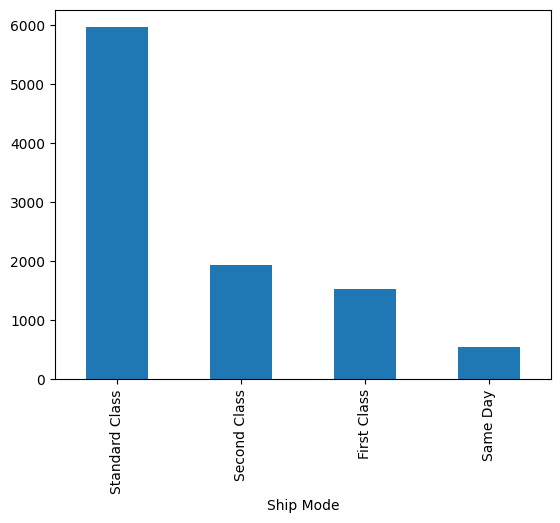

In [6]:
df['Ship Mode'].value_counts().plot(kind="bar")

,City,Profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


<function matplotlib.pyplot.show(close=None, block=None)>

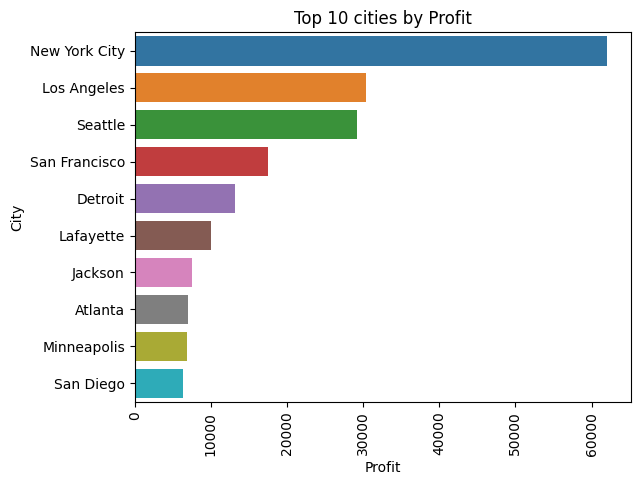

In [7]:
city_profit=df.groupby("City")['Profit'].sum().sort_values(ascending=False).reset_index().head(10)
display(city_profit)
sns.barplot(data=city_profit,y='City',x='Profit')
plt.title('Top 10 cities by Profit')
plt.xticks(rotation=90)
plt.show

,City,Profit
521,Jacksonville,-2323.8350
522,Aurora,-2691.7386
523,Phoenix,-2790.8832
524,Dallas,-2846.5257
525,Burlington,-3622.8772
526,Chicago,-6654.5688
527,Lancaster,-7239.0684
528,San Antonio,-7299.0502
529,Houston,-10153.5485
530,Philadelphia,-13837.7674


<function matplotlib.pyplot.show(close=None, block=None)>

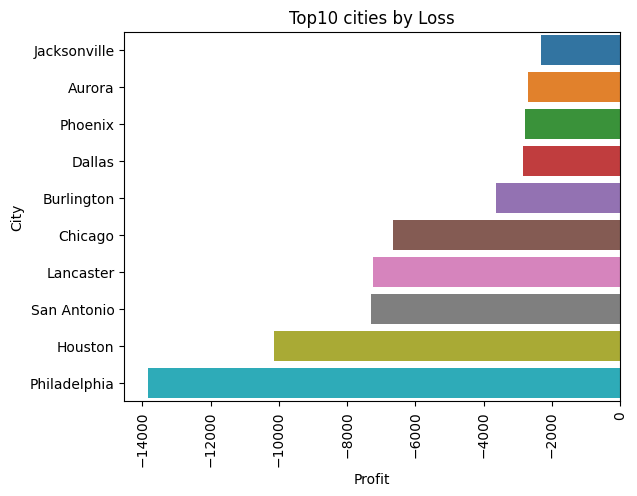

In [8]:
city_loss=df.groupby("City")['Profit'].sum().sort_values(ascending=False).reset_index().tail(10)
display(city_loss)
sns.barplot(data=city_loss, y='City', x='Profit')
plt.title('Top10 cities by Loss')
plt.xticks(rotation=90)
plt.show


,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


<function matplotlib.pyplot.show(close=None, block=None)>

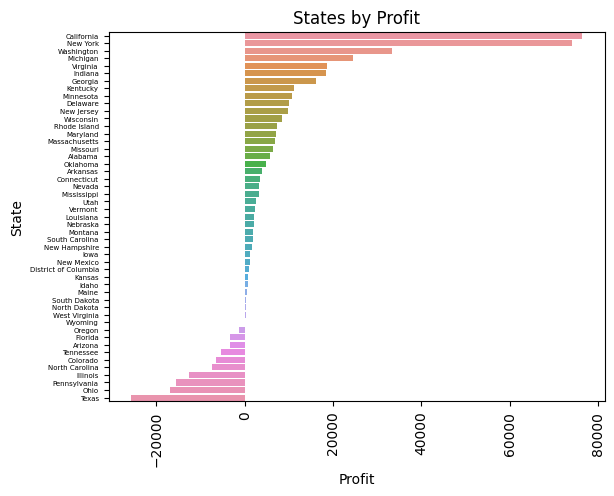

In [9]:
state_profit=df.groupby("State")['Profit'].sum().sort_values(ascending=False).reset_index()
display(state_profit.head(10))
sns.barplot(data=state_profit,y='State',x='Profit')
plt.xticks(rotation=90)
plt.title('States by Profit')
plt.tick_params(axis='y', labelsize=5) # You can adjust the labelsize parameter as need
plt.show

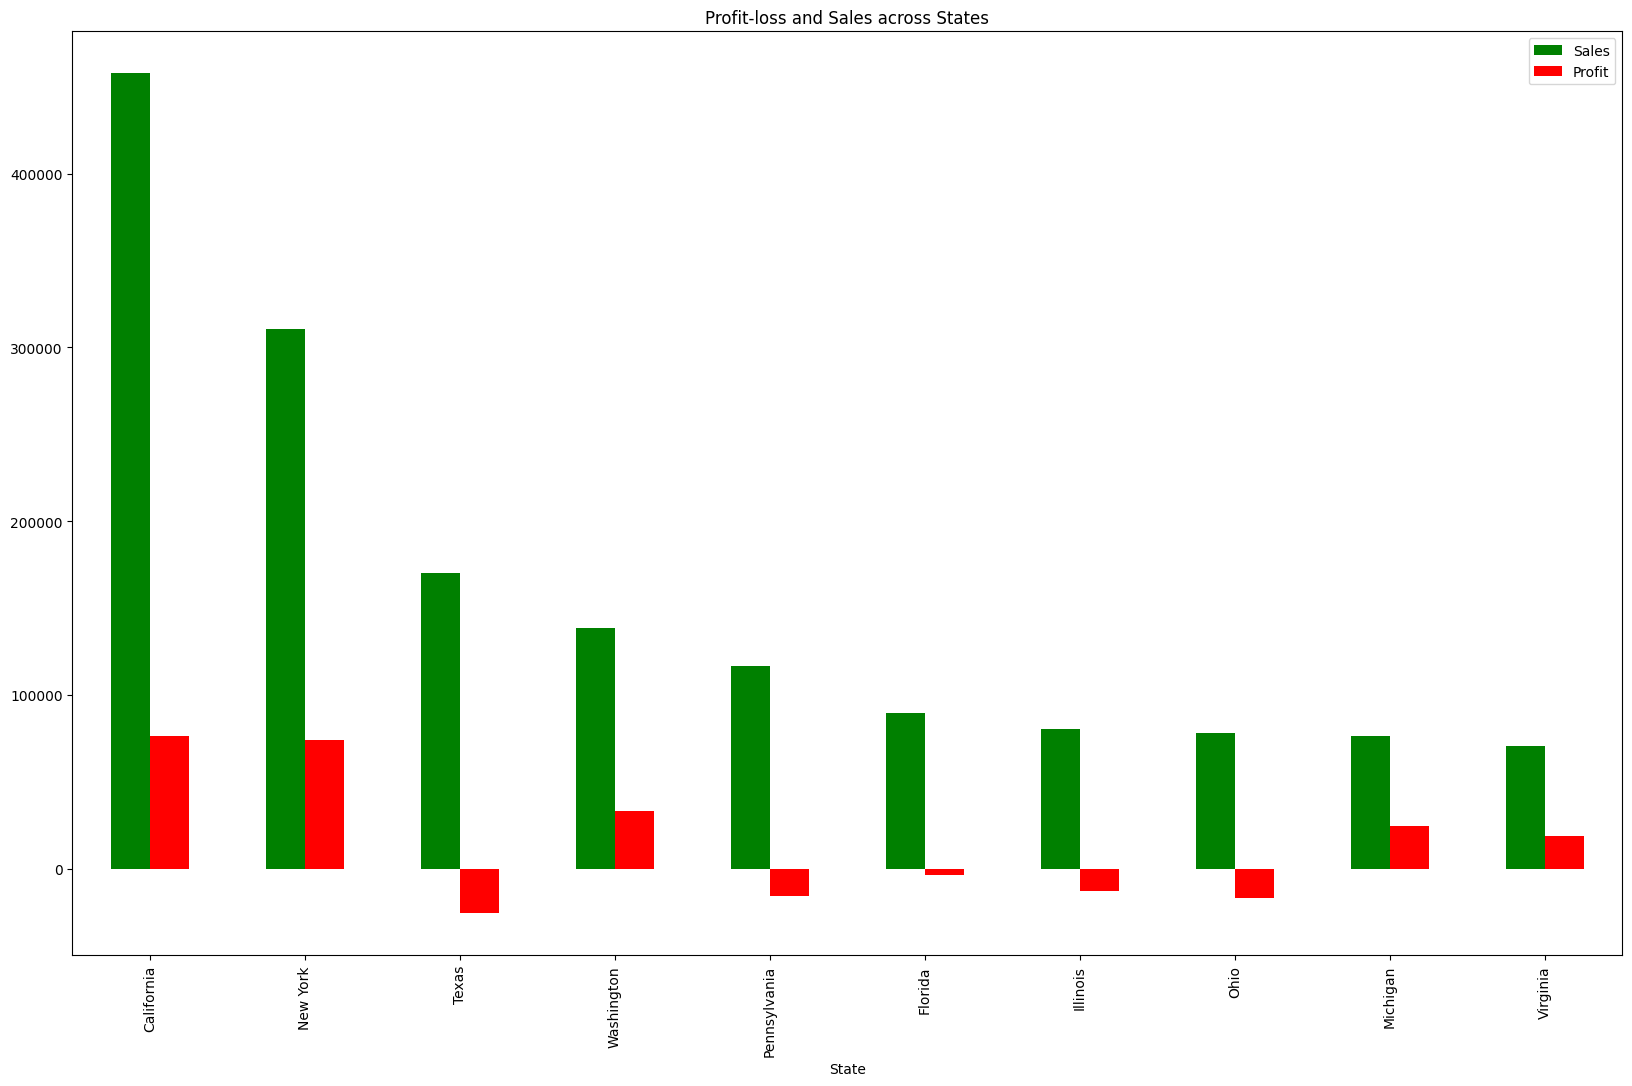

In [10]:
sales_profit = df.groupby("State")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False).head(10)
sales_profit[:].plot.bar(color = ["Green", "Red"], figsize=(20,12))
plt.title("Profit-loss and Sales across States")
plt.show()

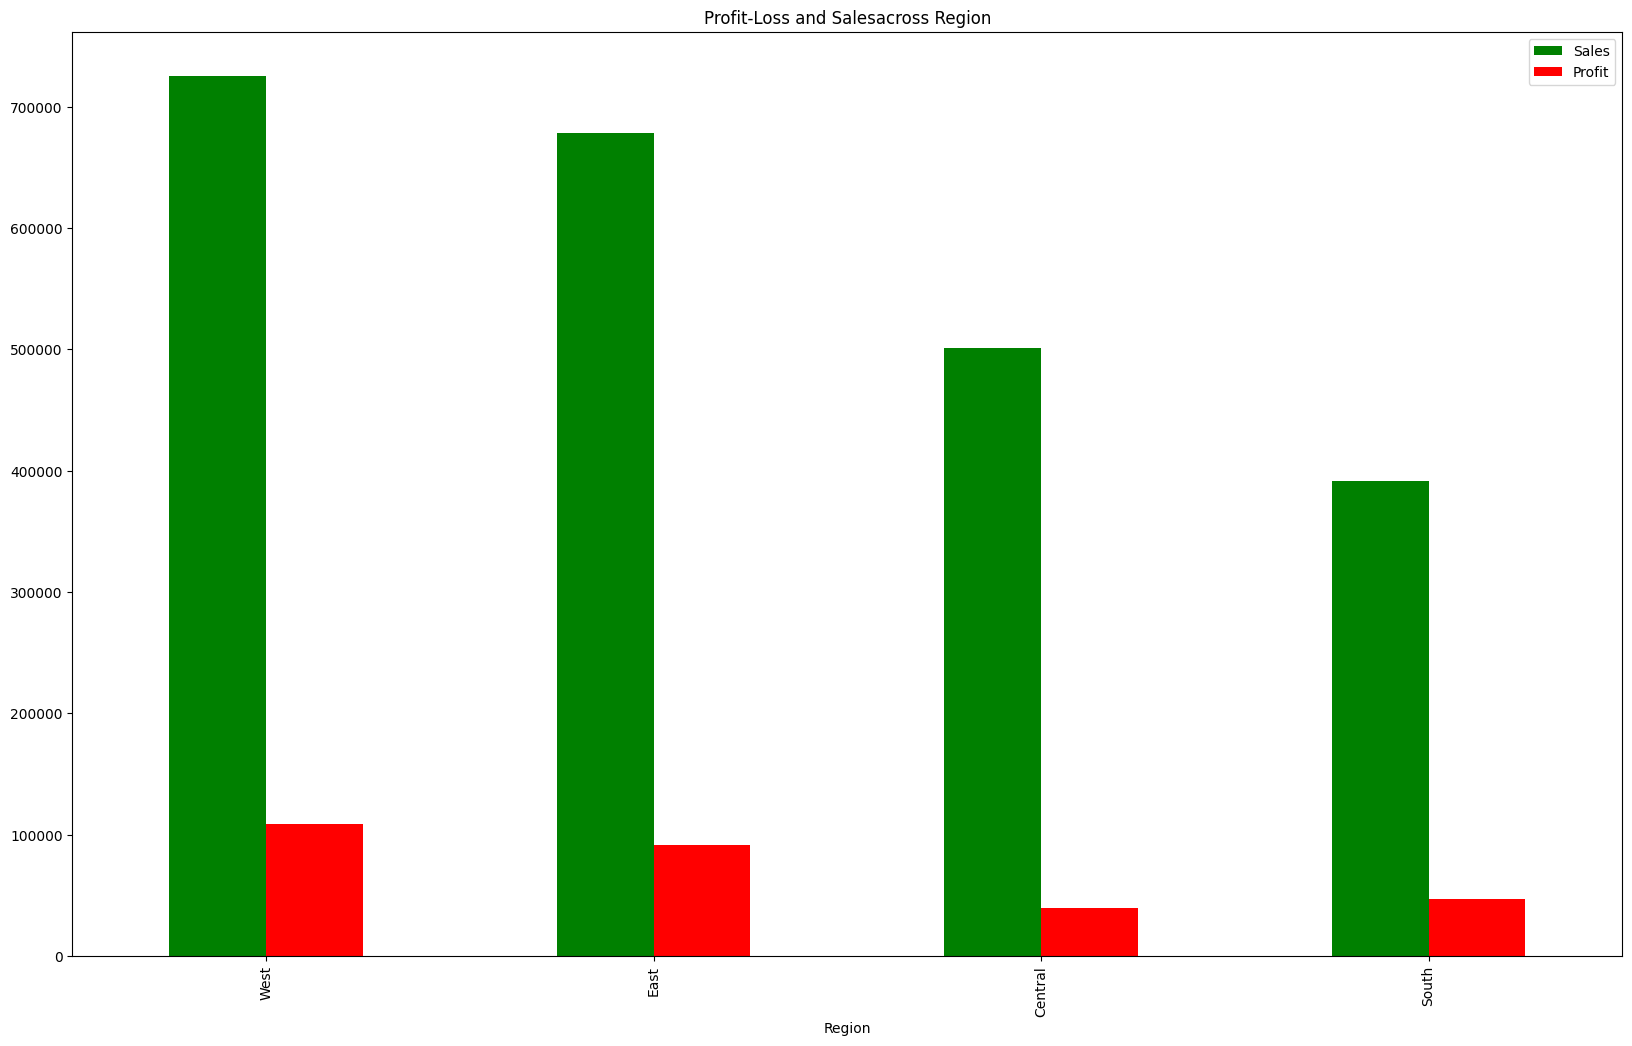

In [11]:
region = df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).head(10)
region[:].plot.bar(color = ["Green", "Red"], figsize=(20,12))
plt.title("Profit-Loss and Salesacross Region")
plt.show()

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


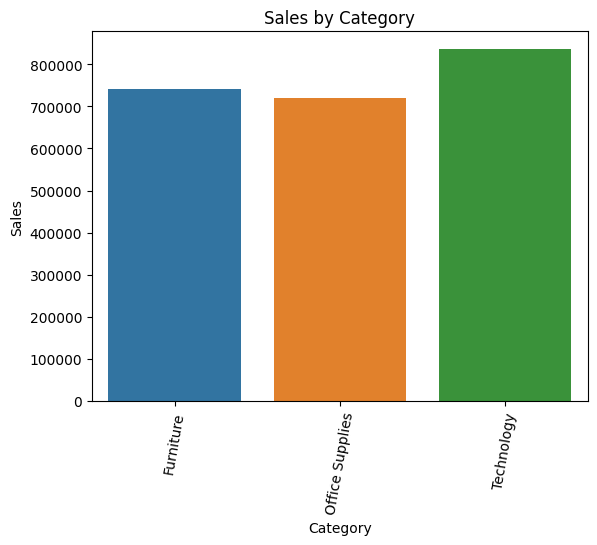

In [12]:
categeory = df.groupby('Category')['Sales'].sum().reset_index()
display(categeory)
sns.barplot(data=categeory,x='Category',y='Sales')
plt.xticks(rotation=80)
plt.title('Sales by Category')
plt.show()

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


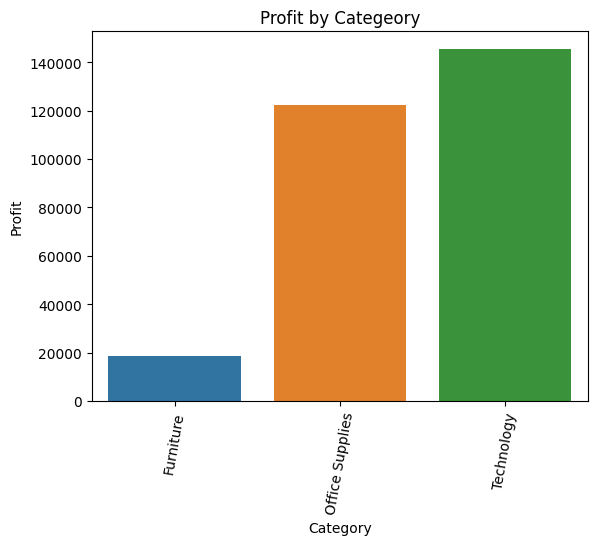

In [13]:
categeory_profit=df.groupby('Category')['Profit'].sum().reset_index()
display(categeory_profit)
sns.barplot(data=categeory_profit,x='Category',y='Profit')
plt.xticks(rotation=80)
plt.title('Profit by Categeory')
plt.show()

,Sub-Category,Sales
0,Fasteners,3024.2800
1,Labels,12486.3120
2,Envelopes,16476.4020
3,Art,27118.7920
4,Supplies,46673.5380
5,Paper,78479.2060
6,Furnishings,91705.1640
7,Appliances,107532.1610
8,Bookcases,114879.9963
9,Copiers,149528.0300


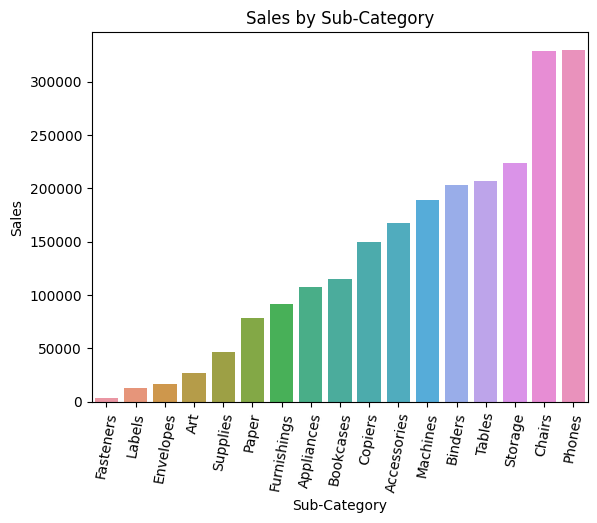

In [14]:
sub_cate=df.groupby('Sub-Category')['Sales'].sum().sort_values().reset_index()
display(sub_cate.head(10))
sns.barplot(data=sub_cate,x='Sub-Category',y='Sales')
plt.xticks(rotation=80)
plt.title('Sales by Sub-Category')
plt.show()

,Sub-Category,Profit
0,Tables,-17725.4811
1,Bookcases,-3472.5560
2,Supplies,-1189.0995
3,Fasteners,949.5182
4,Machines,3384.7569
5,Labels,5546.2540
6,Art,6527.7870
7,Envelopes,6964.1767
8,Furnishings,13059.1436
9,Appliances,18138.0054


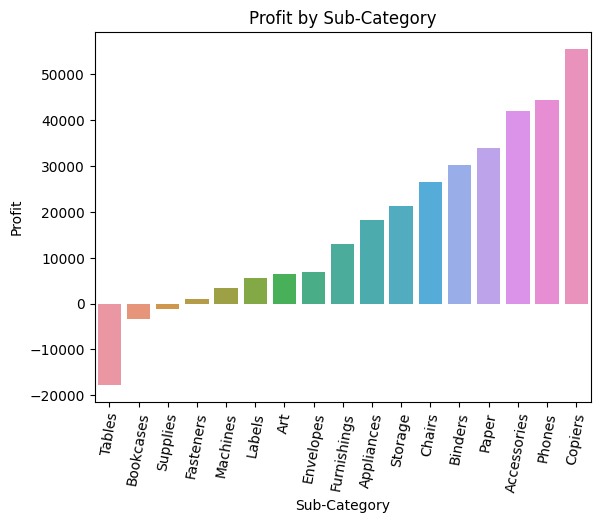

In [15]:
sub_cate_prof=df.groupby('Sub-Category')['Profit'].sum().sort_values().reset_index()
display(sub_cate_prof.head(10))
sns.barplot(data=sub_cate_prof,x='Sub-Category',y='Profit')
plt.xticks(rotation=80)
plt.title('Profit by Sub-Category')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Correlation Between Profit and Discount')

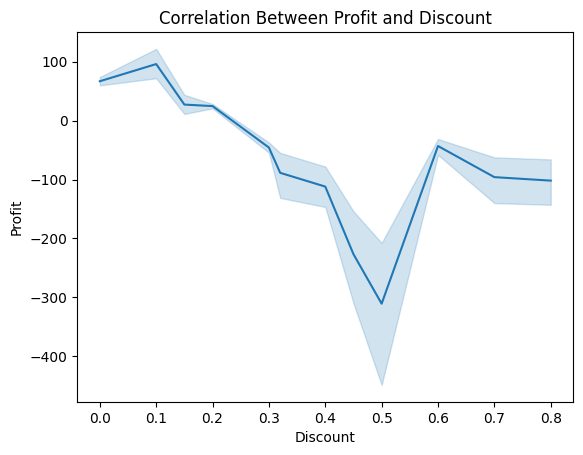

In [16]:
sns.lineplot(data=df,x='Discount',y='Profit')
plt.title('Correlation Between Profit and Discount')

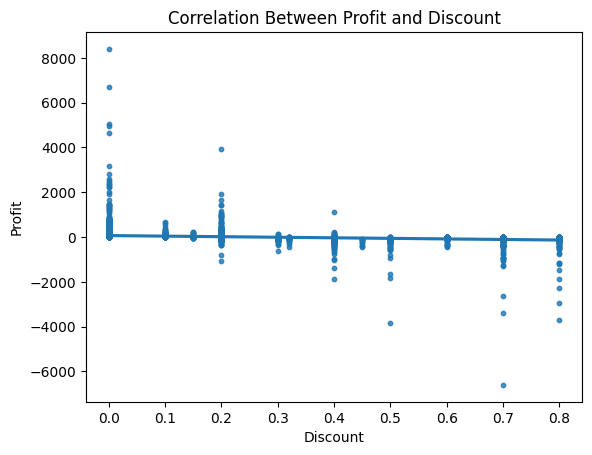

In [17]:
sns.regplot(data=df, x='Discount', y='Profit', scatter_kws={'s':10})
plt.title('Correlation Between Profit and Discount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


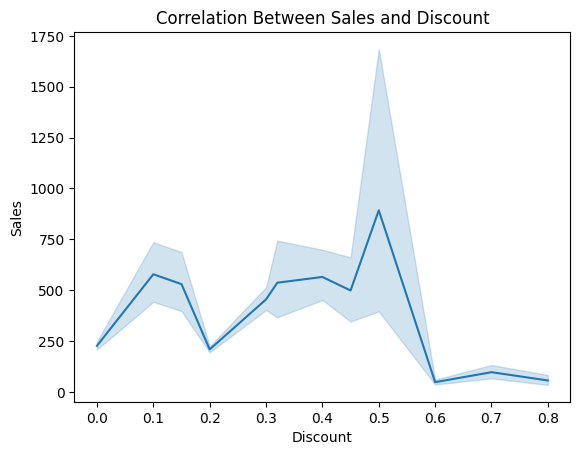

In [18]:
sns.lineplot(data=df,x='Discount',y='Sales')
plt.title('Correlation Between Sales and Discount')
plt.show()

**Credit**:

https://www.kaggle.com/code/adilashrafi/simple-friendly-retail-analysis